# Show the correlations using the location informations and the prices.

In [10]:
import pandas as pd

try:
    barcelona_location = pd.read_csv('/workspaces/Coworking/src/results/Barcelona/LocationCoworking.csv')
    print('File correct exported!')
except Exception as e:
    print('Fallo inesperado')
    
barcelona_location


File correct exported!


,Name,Neighboorhood,Population,Percentage of Population between 16 and 64 years,ForeingPopulation,Unemployes,Household average net rent,Metro,Unnamed: 8
0,Betahaus | Coworking Barcelona,Gràcia,123.000,0.666,0.224,0.051,23.868,1,NaN
1,OneCoWork Plaça Catalunya | Barcelona Coworking,Ciutat Vella,45.671,0.749,0.510,0.083,12.512,5,NaN
2,OneCoWork Catedral | Barcelona Coworking,Ciutat Vella,45.671,0.749,0.510,0.083,12.512,5,NaN
3,Coworking space Camaleó,Ciutat Vella,45.671,0.749,0.510,0.083,12.512,3,NaN
4,La Vaca Coworking Barcelona,Sants-Montjuic,40.157,0.630,0.340,0.050,0.000,2,NaN


In [11]:
import pandas as pd

try:
    barcelona_prices = pd.read_csv('/workspaces/Coworking/src/results/Barcelona/PreciosCoworking.csv')
    print('File correct exported!')
except Exception as e:
    print('Fallo inesperado')
    
print(barcelona_prices)

File correct exported!
                                              Name  Daily Price  Fix Desk
0                   Betahaus | Coworking Barcelona           20       275
1  OneCoWork Plaça Catalunya | Barcelona Coworking           25       235
2         OneCoWork Catedral | Barcelona Coworking           25       265
3                          Coworking space Camaleó           25       200
4                      La Vaca Coworking Barcelona           22       240


In [12]:
merge_data = pd.merge(barcelona_location, barcelona_prices, on='Name', how='inner')

merge_data.head()

,Name,Neighboorhood,Population,Percentage of Population between 16 and 64 years,ForeingPopulation,Unemployes,Household average net rent,Metro,Unnamed: 8,Daily Price,Fix Desk
0,Betahaus | Coworking Barcelona,Gràcia,123.000,0.666,0.224,0.051,23.868,1,NaN,20,275
1,OneCoWork Plaça Catalunya | Barcelona Coworking,Ciutat Vella,45.671,0.749,0.510,0.083,12.512,5,NaN,25,235
2,OneCoWork Catedral | Barcelona Coworking,Ciutat Vella,45.671,0.749,0.510,0.083,12.512,5,NaN,25,265
3,Coworking space Camaleó,Ciutat Vella,45.671,0.749,0.510,0.083,12.512,3,NaN,25,200
4,La Vaca Coworking Barcelona,Sants-Montjuic,40.157,0.630,0.340,0.050,0.000,2,NaN,22,240


In [23]:
merge_data.to_csv('prices_location.csv', index=False)

In [13]:
merge_data.isnull().sum()

Name                                                0
Neighboorhood                                       0
Population                                          0
Percentage of Population between 16 and 64 years    0
ForeingPopulation                                   0
Unemployes                                          0
Household average net rent                          0
Metro                                               0
Unnamed: 8                                          5
Daily Price                                         0
Fix Desk                                            0
dtype: int64

In [16]:
merge_data = merge_data.drop(columns='Unnamed: 8', axis=1)

merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Name                                              5 non-null      object 
 1   Neighboorhood                                     5 non-null      object 
 2   Population                                        5 non-null      float64
 3   Percentage of Population between 16 and 64 years  5 non-null      float64
 4   ForeingPopulation                                 5 non-null      float64
 5   Unemployes                                        5 non-null      float64
 6   Household average net rent                        5 non-null      float64
 7   Metro                                             5 non-null      int64  
 8   Daily Price                                       5 non-null      int64  
 9   Fix Desk                 

In [17]:
# Calculate the unemployment percentage
merge_data['Unemployes Percentage'] = (merge_data['Unemployes'] / merge_data['Population'].replace(0, 1)) * 100

# Remove the raw 'Unemployes' column
merge_df = merge_data.drop(columns=['Unemployes'])

In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the numerical columns you want to scale
numerical_columns = ['Population', 'Percentage of Population between 16 and 64 years', 'ForeingPopulation',
                     'Household average net rent', 'Metro', 'Fix Desk', 'Daily Price', 'Unemployes Percentage']

# Apply the scaling to these columns
merge_data[numerical_columns] = scaler.fit_transform(merge_data[numerical_columns])

# Check the result
merge_data.head()


,Name,Neighboorhood,Population,Percentage of Population between 16 and 64 years,ForeingPopulation,Unemployes,Household average net rent,Metro,Daily Price,Fix Desk,Unemployes Percentage
0,Betahaus | Coworking Barcelona,Gràcia,1.995415,-0.839038,-1.656942,0.051,1.534112,-1.375,-1.651186,1.221766,-1.830729
1,OneCoWork Plaça Catalunya | Barcelona Coworking,Ciutat Vella,-0.455169,0.795707,0.775735,0.083,0.030610,1.125,0.777029,-0.305441,0.717576
2,OneCoWork Catedral | Barcelona Coworking,Ciutat Vella,-0.455169,0.795707,0.775735,0.083,0.030610,1.125,0.777029,0.839964,0.717576
3,Coworking space Camaleó,Ciutat Vella,-0.455169,0.795707,0.775735,0.083,0.030610,-0.125,0.777029,-1.641748,0.717576
4,La Vaca Coworking Barcelona,Sants-Montjuic,-0.629909,-1.548084,-0.670262,0.050,-1.625943,-0.750,-0.679900,-0.114541,-0.321999


## Visualizations.

### Heatmap

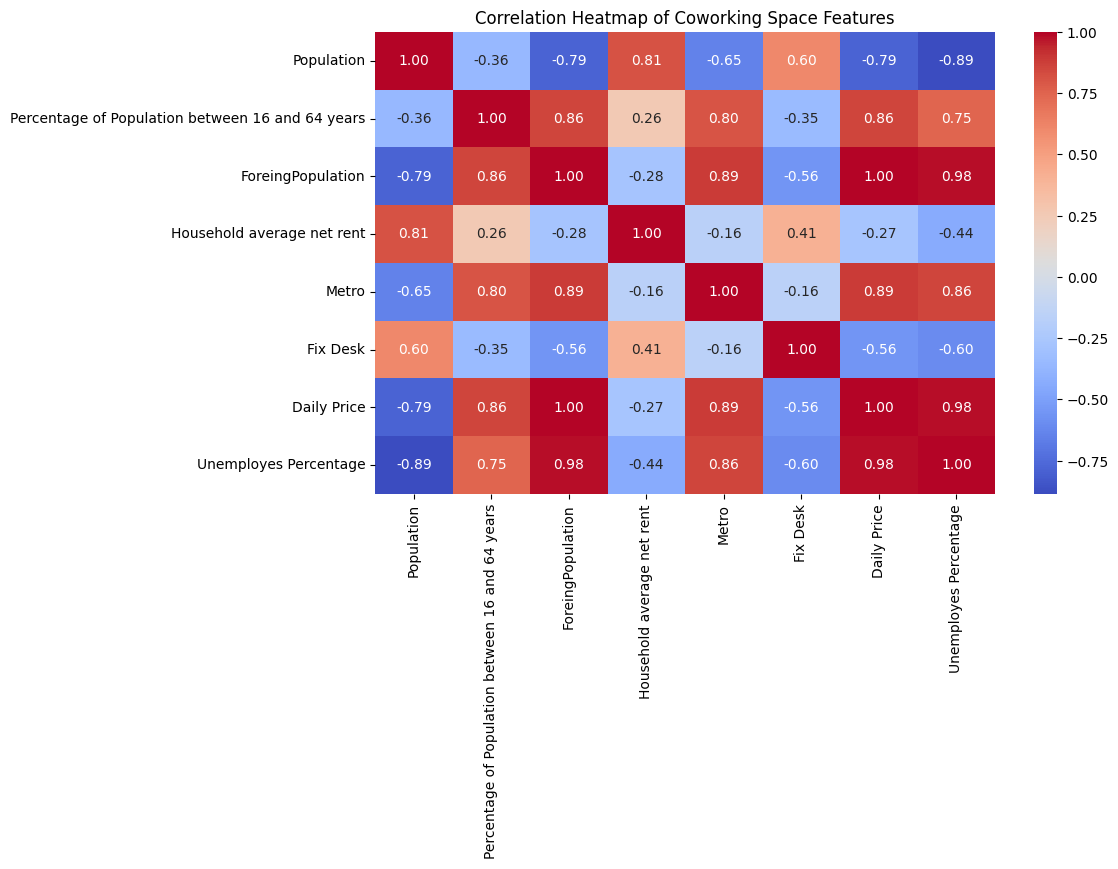

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = merge_data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Coworking Space Features')
plt.show()


### 

 - Urban vs. Non-Urban Dynamics: Metro areas tend to have higher foreign populations, higher daily prices, and a higher percentage of working-age population, but they also have higher unemployment rates.

 - Population Density: Higher population areas tend to have lower foreign populations, higher rents, and lower unemployment rates.

 - Economic Indicators: Daily prices and rents are strongly correlated with the presence of a working-age population and foreign populations, suggesting that economic activity is concentrated in areas with these demographics.

 - Employment Challenges: Despite having a higher percentage of working-age population, metro areas and areas with higher foreign populations tend to have higher unemployment rates, indicating potential challenges in job markets.